# Heart Failure Research ML Model Comparison

In this notebook we will be analyzing some data and comparing various ML models in which I do a moderate amount of turning and adjustment. The models we will be trying are (1) dense connected neural networks, (2) Random Forests, (3) and XGBoost. XGBoost is perhaps the most conceptually complex of these algorithms as it pulls together many different types of models and techniques from bagging to gradient boosting. Here are some good links for learning about XGBoost: [link1](https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/) and [link2](https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/).

### Read in the data

In [1]:
import pandas as pd
# https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
csv_path = "../data/chf_data.csv"
data = pd.read_csv(csv_path, header=1) 

# convert string values to integers 0 and 1
data['Gender'] = data['Gender'].map({'M': 1, 'F': 0})
data['DM'] = data['DM'].map({'Yes': 1, 'No': 0})
data['30 day readmission'] = data['30 day readmission'].map({'Yes': 1, 'No': 0})
data['60 day readmission'] = data['60 day readmission'].map({'Yes': 1, 'No': 0})
data['30 day death'] = data['30 day death'].map({'Yes': 1, 'No': 0})
data['60 day death'] = data['60 day death'].map({'Yes': 1, 'No': 0})
data['90 day death'] = data['90 day death'].map({'Yes': 1, 'No': 0})
data['Hypertension'] = data['Hypertension'].map({'Yes': 1, 'No': 0})
data['Coronary Artery Disease'] = data['Coronary Artery Disease'].map({'Yes': 1, 'No': 0})
data['Prior Stroke / TIA / Cerebral Vascular Ischemia'] = data['Prior Stroke / TIA / Cerebral Vascular Ischemia'].map({'Yes': 1, 'No': 0})
data['Atrial Fibrillation'] = data['Atrial Fibrillation'].map({'Yes': 1, 'No': 0})
data['Peripheral vascular disease'] = data['Peripheral vascular disease'].map({'Yes': 1, 'No': 0})
data['Obstructive Sleep Apnea'] = data['Obstructive Sleep Apnea'].map({'Yes': 1, 'No': 0})
data['Aortic Stenosis 0 = No, 1= yes / mild, 2=moderate, 3=severe'] = data['Aortic Stenosis 0 = No, 1= yes / mild, 2=moderate, 3=severe'].map({'Yes': 1, 'No': 0})
data['Dialysis'] = data['Dialysis'].map({'Yes': 1, 'No': 0})

data

,"monty, year, case #",Admission Date,Age,Gender,BMI,Zip Code,Echocardiogram LVEF (%),Troponin (highest),Hemoglobin A1C,Creat (Chem 7 within 24 hours of admission),...,90 day death,DM,Hypertension,Coronary Artery Disease,Prior Stroke / TIA / Cerebral Vascular Ischemia,Atrial Fibrillation,Peripheral vascular disease,Obstructive Sleep Apnea,"Aortic Stenosis 0 = No, 1= yes / mild, 2=moderate, 3=severe",Dialysis
0,1,3/31/2018,78,1,26.22,95828,65,0.11,6.5,1.19,...,0.0,1.0,1,0,0.0,1.0,0.0,0.0,NaN,NaN
1,2,4/3/2018,66,1,28.18,95833,15,0.03,5.5,1.78,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,NaN,NaN
2,3,4/6/2018,86,1,19.77,95691,31,0.11,5.5,1.32,...,0.0,1.0,1,1,0.0,0.0,0.0,0.0,NaN,NaN
3,4,4/6/2018,79,1,23.40,95829,35,0.06,5.4,2.37,...,1.0,0.0,1,0,0.0,1.0,0.0,0.0,NaN,NaN
4,5,4/7/2018,58,1,31.13,94565,49,0.44,5.5,2.17,...,0.0,0.0,1,1,0.0,1.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,101815,10/20/18,78,1,23.10,95831,33,0.03,5.5,0.87,...,0.0,0.0,1,0,0.0,1.0,0.0,0.0,NaN,0.0
116,101816,10/14/18,81,0,16.59,95824,65,0.02,6.6,2.29,...,0.0,1.0,1,1,0.0,0.0,0.0,0.0,NaN,0.0
117,101817,10/2/18,68,0,38.74,95822,42,0.05,11.4,1.13,...,0.0,1.0,1,1,0.0,0.0,1.0,1.0,NaN,0.0
118,101818,10/10/18,78,1,29.95,95822,19,0.05,6.6,1.03,...,0.0,1.0,0,1,1.0,1.0,1.0,0.0,NaN,0.0


In [2]:
# get the data from patient three
data.loc(0)[4]

monty, year, case #                                                   5
Admission Date                                                 4/7/2018
Age                                                                  58
Gender                                                                1
BMI                                                               31.13
Zip Code                                                          94565
Echocardiogram LVEF (%)                                              49
Troponin (highest)                                                 0.44
Hemoglobin A1C                                                      5.5
Creat (Chem 7 within 24 hours of admission)                        2.17
GFR                                                                  31
BNP (Initial, B-type naturetic peptide)                             180
Urine Tox negative (0) or per history                                 1
Urine Tox Pos Stimulant (1)                                     

In [3]:
# get the data from patient three
data.loc(0)[4]

# Find all the data samples were the Gender is Male
data.loc[data['Gender'] == 1].head(6) # only print out first 6

,"monty, year, case #",Admission Date,Age,Gender,BMI,Zip Code,Echocardiogram LVEF (%),Troponin (highest),Hemoglobin A1C,Creat (Chem 7 within 24 hours of admission),...,90 day death,DM,Hypertension,Coronary Artery Disease,Prior Stroke / TIA / Cerebral Vascular Ischemia,Atrial Fibrillation,Peripheral vascular disease,Obstructive Sleep Apnea,"Aortic Stenosis 0 = No, 1= yes / mild, 2=moderate, 3=severe",Dialysis
0,1,3/31/2018,78,1,26.22,95828,65,0.11,6.5,1.19,...,0.0,1.0,1,0,0.0,1.0,0.0,0.0,NaN,NaN
1,2,4/3/2018,66,1,28.18,95833,15,0.03,5.5,1.78,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,NaN,NaN
2,3,4/6/2018,86,1,19.77,95691,31,0.11,5.5,1.32,...,0.0,1.0,1,1,0.0,0.0,0.0,0.0,NaN,NaN
3,4,4/6/2018,79,1,23.40,95829,35,0.06,5.4,2.37,...,1.0,0.0,1,0,0.0,1.0,0.0,0.0,NaN,NaN
4,5,4/7/2018,58,1,31.13,94565,49,0.44,5.5,2.17,...,0.0,0.0,1,1,0.0,1.0,0.0,0.0,NaN,NaN
5,6,4/7/2018,37,1,22.07,95757,15,0.04,5.5,1.99,...,0.0,0.0,1,0,0.0,1.0,0.0,0.0,NaN,NaN


### Do some basic data analysis

Lets look for any potential sources of bias that might reduce the generalizability of our results. We can also check which data sources may not be reliable to use due to sparse information. Note that some machine learning algorithms are not bothered all that much by missing data such as random forests and XGBoost, however ML models such as neural networks require all the data points to be provided in order to get a result which means that if some data is missing either you ommit the data from the patients who are missing the necessary data points or you ommit the data that the missing points belong to from the whole algorithm. 

Graph options can be found here https://seaborn.pydata.org/examples/index.html

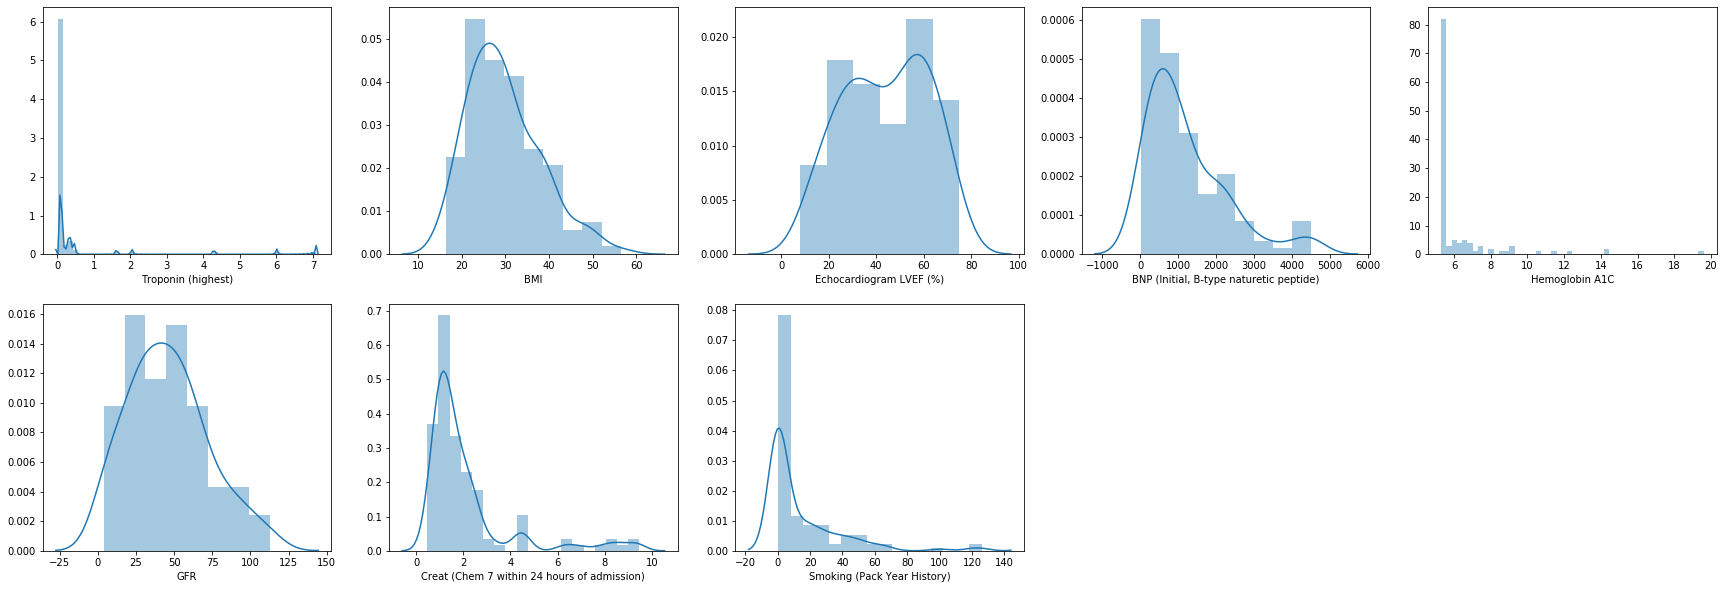

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(30,10))
fig.add_subplot(2,5,1)
sns.distplot(data['Troponin (highest)'])
fig.add_subplot(2,5,2)
sns.distplot(data['BMI'])
fig.add_subplot(2,5,3)
sns.distplot(data['Echocardiogram LVEF (%)'])
fig.add_subplot(2,5,4)
sns.distplot(data['BNP (Initial, B-type naturetic peptide)'])
fig.add_subplot(2,5,5)
sns.distplot(data['Hemoglobin A1C'], kde=False)
fig.add_subplot(2,5,6)
sns.distplot(data['GFR'])
fig.add_subplot(2,5,7)
sns.distplot(data['Creat (Chem 7 within 24 hours of admission)'])
fig.add_subplot(2,5,8)
sns.distplot(data['Smoking (Pack Year History)'])

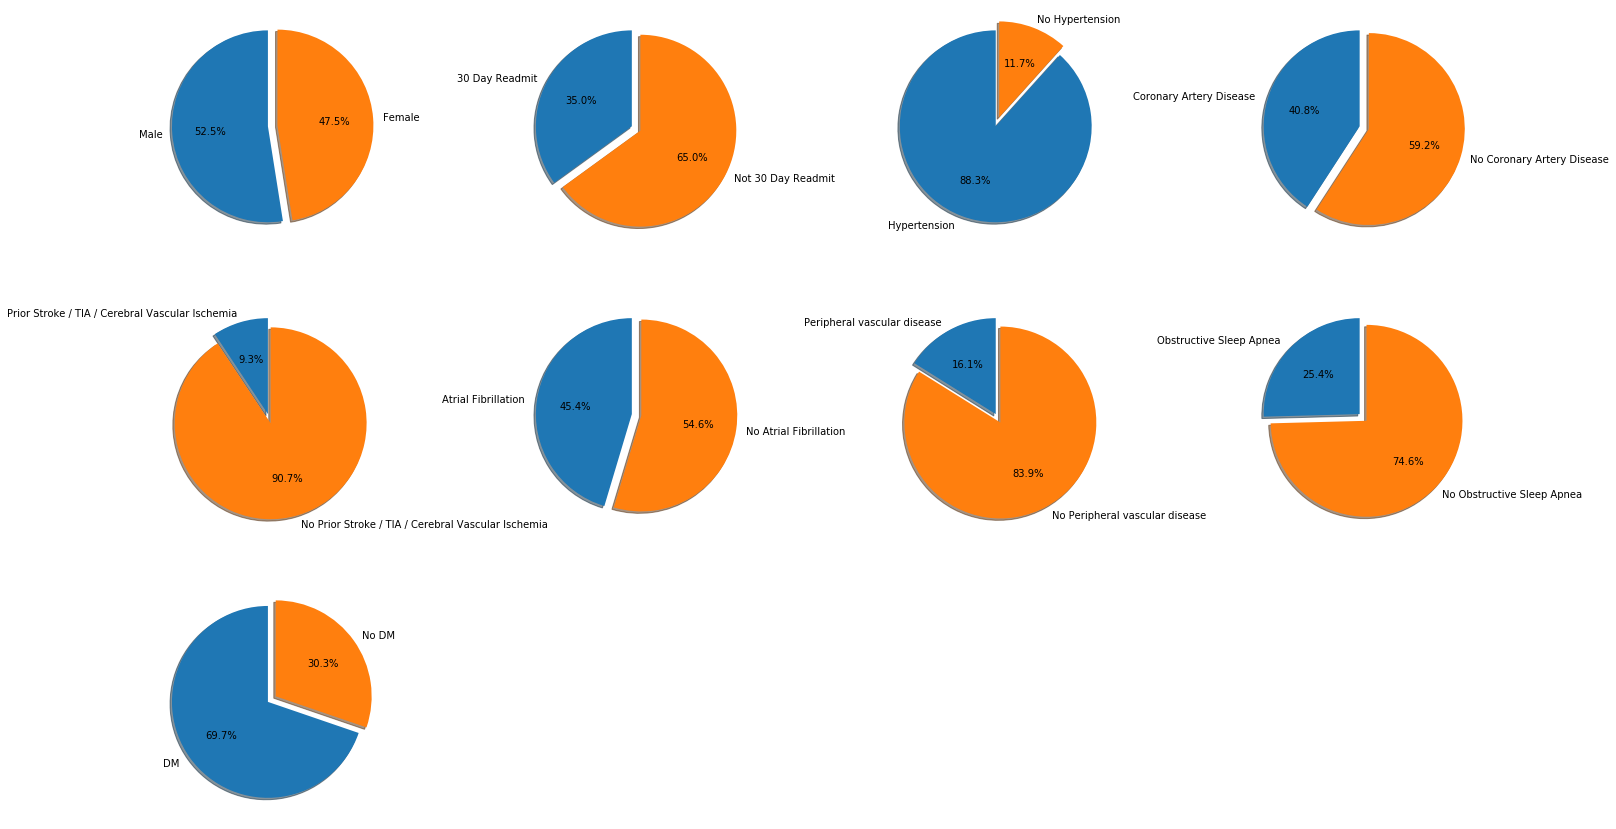

In [5]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig = plt.figure(figsize=(25,15))

fig.add_subplot(3,4,1)

labels = 'Male', 'Female'
sizes = [data.loc[data['Gender'] == 1].shape[0], data.loc[data['Gender'] == 0].shape[0]]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

fig.add_subplot(3,4,2)

labels = '30 Day Readmit', 'Not 30 Day Readmit'
sizes = [data.loc[data['30 day readmission'] == 1].shape[0], data.loc[data['30 day readmission'] == 0].shape[0]]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

fig.add_subplot(3,4,3)

labels = 'Hypertension ', 'No Hypertension'
sizes = [data.loc[data['Hypertension'] == 1].shape[0], data.loc[data['Hypertension'] == 0].shape[0]]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

fig.add_subplot(3,4,4)

labels = 'Coronary Artery Disease ', 'No Coronary Artery Disease'
sizes = [data.loc[data['Coronary Artery Disease'] == 1].shape[0], data.loc[data['Coronary Artery Disease'] == 0].shape[0]]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

fig.add_subplot(3,4,5)

labels = 'Prior Stroke / TIA / Cerebral Vascular Ischemia', 'No Prior Stroke / TIA / Cerebral Vascular Ischemia'
sizes = [data.loc[data['Prior Stroke / TIA / Cerebral Vascular Ischemia'] == 1].shape[0], data.loc[data['Prior Stroke / TIA / Cerebral Vascular Ischemia'] == 0].shape[0]]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

fig.add_subplot(3,4,6)

labels = 'Atrial Fibrillation ', 'No Atrial Fibrillation'
sizes = [data.loc[data['Atrial Fibrillation'] == 1].shape[0], data.loc[data['Atrial Fibrillation'] == 0].shape[0]]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

fig.add_subplot(3,4,7)

labels = 'Peripheral vascular disease ', 'No Peripheral vascular disease'
sizes = [data.loc[data['Peripheral vascular disease'] == 1].shape[0], data.loc[data['Peripheral vascular disease'] == 0].shape[0]]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

fig.add_subplot(3,4,8)

labels = 'Obstructive Sleep Apnea ', 'No Obstructive Sleep Apnea'
sizes = [data.loc[data['Obstructive Sleep Apnea'] == 1].shape[0], data.loc[data['Obstructive Sleep Apnea'] == 0].shape[0]]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

fig.add_subplot(3,4,9)

labels = 'DM ', 'No DM'
sizes = [data.loc[data['DM'] == 1].shape[0], data.loc[data['DM'] == 0].shape[0]]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

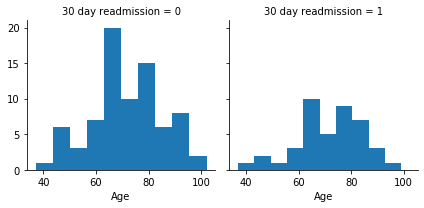

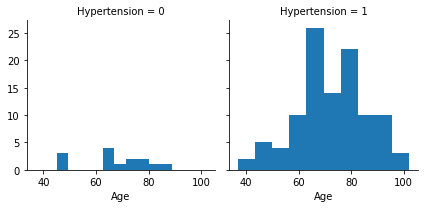

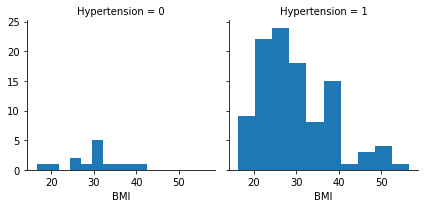

In [6]:
g = sns.FacetGrid(data, col="30 day readmission")
g.map(plt.hist, "Age");

g = sns.FacetGrid(data, col="Hypertension")
g.map(plt.hist, "Age");

g = sns.FacetGrid(data, col="Hypertension")
g.map(plt.hist, "BMI");

## ML Time

### Neural Network

Lets start with a simpled deep neural network using techniques such as dropout. The data we will be using to make the 30 day readmit prediction are age, gender, BMI, Troponin,  Creat (Chem 7 within 24 hours of admission), BNP (Initial, B-type naturetic peptide), and Coronary Artery Disease (7 categories)

In [67]:
import tensorflow as tf
print(tf.__version__)
tf.config.experimental.list_physical_devices('GPU')

2.1.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Clean up the data so that we remove all the datapoints that have NaNs in any of the categories that we care about. This must be done with a neural network model.

In [68]:
nn_df = data[["Age", "Gender", "BMI", "Troponin (highest)", "Creat (Chem 7 within 24 hours of admission)", "BNP (Initial, B-type naturetic peptide)", "Coronary Artery Disease", "30 day readmission"]]
nn_df

,Age,Gender,BMI,Troponin (highest),Creat (Chem 7 within 24 hours of admission),"BNP (Initial, B-type naturetic peptide)",Coronary Artery Disease,30 day readmission
0,71,F,22.13,2.04,1.90,640.0,Yes,No
1,58,M,31.13,0.44,2.17,180.0,Yes,Yes
2,68,F,20.87,0.03,0.63,641.0,No,No
3,60,M,46.16,0.04,1.06,131.0,No,No
4,83,M,30.51,NaN,2.36,908.0,Yes,Yes
...,...,...,...,...,...,...,...,...
95,72,F,34.40,0.02,1.33,1295.0,No,No
96,56,F,25.79,0.03,NaN,3876.0,No,No
97,75,F,42.38,0.02,0.70,116.0,No,Yes
98,44,M,24.68,0.12,1.30,2987.0,No,No


In [69]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
nn_df = nn_df.dropna() # remove all the inavalid / NaN data
nn_df

,Age,Gender,BMI,Troponin (highest),Creat (Chem 7 within 24 hours of admission),"BNP (Initial, B-type naturetic peptide)",Coronary Artery Disease,30 day readmission
0,71,F,22.13,2.04,1.90,640.0,Yes,No
1,58,M,31.13,0.44,2.17,180.0,Yes,Yes
2,68,F,20.87,0.03,0.63,641.0,No,No
3,60,M,46.16,0.04,1.06,131.0,No,No
8,77,M,23.63,0.09,3.16,4500.0,No,No
...,...,...,...,...,...,...,...,...
94,82,F,28.68,0.04,1.20,633.0,No,No
95,72,F,34.40,0.02,1.33,1295.0,No,No
97,75,F,42.38,0.02,0.70,116.0,No,Yes
98,44,M,24.68,0.12,1.30,2987.0,No,No


In [70]:
nn_numpy = nn_df.to_numpy()
nn_numpy

array([[71, 'F', 22.13, 2.04, 1.9, 640.0, 'Yes', 'No'],
       [58, 'M', 31.13, 0.44, 2.17, 180.0, 'Yes', 'Yes'],
       [68, 'F', 20.87, 0.03, 0.63, 641.0, 'No', 'No'],
       [60, 'M', 46.16, 0.04, 1.06, 131.0, 'No', 'No'],
       [77, 'M', 23.63, 0.09, 3.16, 4500.0, 'No', 'No'],
       [77, 'F', 16.65, 0.46, 4.71, 2520.0, 'Yes', 'Yes'],
       [77, 'F', 16.31, 0.02, 1.93, 601.0, 'No', 'Yes'],
       [76, 'F', 16.31, 0.02, 1.46, 1134.0, 'No', 'Yes'],
       [67, 'F', 50.74, 0.04, 1.45, 140.0, 'Yes', 'Yes'],
       [89, 'M', 26.93, 0.06, 4.33, 640.0, 'Yes', 'Yes'],
       [61, 'F', 30.57, 0.17, 1.8, 1552.0, 'Yes', 'Yes'],
       [70, 'F', 39.24, 0.07, 8.87, 2280.0, 'No', 'No'],
       [99, 'F', 24.72, 0.02, 0.89, 372.0, 'No', 'No'],
       [90, 'F', 21.14, 0.31, 0.88, 563.0, 'Yes', 'No'],
       [82, 'F', 31.02, 0.03, 1.09, 1331.0, 'Yes', 'Yes'],
       [82, 'M', 20.33, 0.09, 6.55, 1121.0, 'No', 'No'],
       [90, 'F', 30.71, 1.63, 1.72, 2159.0, 'No', 'No'],
       [84, 'M', 37.31, 0.

In [71]:
# Normalize data and convert to neural net friendly format
for row in nn_numpy:
    # convert gender to zero or 1
    if row[1] == "F":
        row[1] = 0.0
    else:
        row[1] = 1.0
        
    if row[6] == "Yes":
        row[6] = 0.0
    else:
        row[6] = 1.0
        
    if row[7] == "Yes":
        row[7] = 0.0
    else:
        row[7] = 1.0

In [72]:
mean = nn_numpy.sum(axis=0)/nn_numpy.shape[0]
print(mean)

[70.9875 0.4875 29.68875 0.13249999999999984 2.127375 1168.6875 0.65 0.675]


In [98]:
variance = np.absolute((nn_numpy - mean)).sum(axis=0)/nn_numpy.shape[0]
print(variance)

[10.686875000000002 0.49968749999999973 6.748468749999995
 0.14118749999999997 1.2433125000000003 810.6109375 0.4550000000000004
 0.43875000000000003]


In [86]:
range_min = nn_numpy.min(axis=0)
print(range_min)

[37 0.0 16.31 0.02 0.54 64.0 0.0 0.0]


In [87]:
range_max = nn_numpy.max(axis=0)
print(range_max)

[102 1.0 50.74 2.04 9.47 4500.0 1.0 1.0]


In [104]:
# make all the data go from zero to one
# the range varibales will need ot be stored in order to validate other data sinec normalization will need to be run on it as well. 
# performance is not gauranteed for data outside the range of the set since normalization will be incorrect (you may get numbers less than zero or greater than 1).
normalized_nn_data = (nn_numpy - range_min)/(range_max-range_min)
print(normalized_nn_data[0])

[0.5230769230769231 0.0 0.16903862910252684 1.0 0.1522956326987682
 0.12984670874661858 0.0 1.0]


In [155]:
# split the data so that x and y are seoaret arrays
np.random.shuffle(normalized_nn_data)
x  = normalized_nn_data[:, :normalized_nn_data.shape[1]-2].astype(np.float32)
y  = normalized_nn_data[:, normalized_nn_data.shape[1]-1].astype(np.float32)

print(x.shape)
print(y.shape)

(80, 6)
(80,)


#### Building the Neural Networks

We will use deep connected layers with dropout

In [267]:
nn_model = tf.keras.Sequential([
    tf.keras.Input(6),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid') # this will bind the output from 0 to 1
])
nn_model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01), loss='binary_crossentropy', metrics = ['acc'])
nn_model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 50)                350       
_________________________________________________________________
dropout_148 (Dropout)        (None, 50)                0         
_________________________________________________________________
activation_173 (Activation)  (None, 50)                0         
_________________________________________________________________
dense_177 (Dense)            (None, 50)                2550      
_________________________________________________________________
dropout_149 (Dropout)        (None, 50)                0         
_________________________________________________________________
activation_174 (Activation)  (None, 50)                0         
_________________________________________________________________
dense_178 (Dense)            (None, 50)              

In [268]:
history = nn_model.fit(x, y, epochs=300, validation_split=0.5)

Train on 40 samples, validate on 40 samples
Epoch 1/300
40/40 [==============================] - 0s 8ms/sample - loss: 0.7142 - acc: 0.4250 - val_loss: 0.6924 - val_acc: 0.6500
Epoch 2/300
40/40 [==============================] - 0s 219us/sample - loss: 0.6812 - acc: 0.5750 - val_loss: 0.6911 - val_acc: 0.6750
Epoch 3/300
40/40 [==============================] - 0s 203us/sample - loss: 0.7004 - acc: 0.4500 - val_loss: 0.6903 - val_acc: 0.6750
Epoch 4/300
40/40 [==============================] - 0s 208us/sample - loss: 0.6991 - acc: 0.5000 - val_loss: 0.6893 - val_acc: 0.6500
Epoch 5/300
40/40 [==============================] - 0s 201us/sample - loss: 0.6851 - acc: 0.6000 - val_loss: 0.6881 - val_acc: 0.7250
Epoch 6/300
40/40 [==============================] - 0s 210us/sample - loss: 0.7061 - acc: 0.3750 - val_loss: 0.6869 - val_acc: 0.7250
Epoch 7/300
40/40 [==============================] - 0s 204us/sample - loss: 0.6898 - acc: 0.5000 - val_loss: 0.6861 - val_acc: 0.7000
Epoch 8/300
4

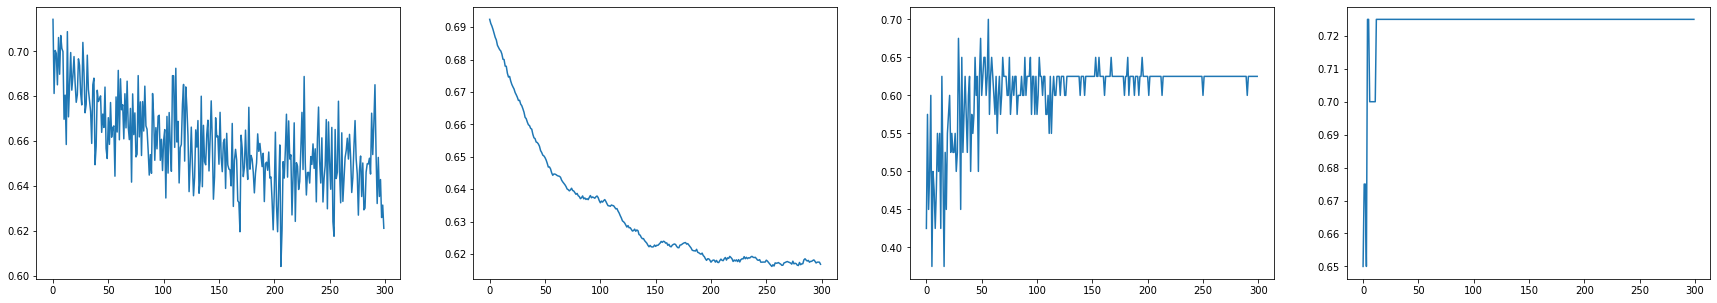

In [269]:
fig = plt.figure(figsize=(30,5))
fig.add_subplot(1,4,1)
plt.plot(history.history['loss'])
fig.add_subplot(1,4,2)
plt.plot(history.history['val_loss'])
fig.add_subplot(1,4,3)
plt.plot(history.history['acc'])
fig.add_subplot(1,4,4)
plt.plot(history.history['val_acc'])

### XGBoost

https://xgboost.readthedocs.io/en/latest/tutorials/model.html

Now lets try out a simple XGBoost algorithm. The data we will be the same as the neural network: the 30 day readmit prediction are age, gender, BMI, Troponin,  Creat (Chem 7 within 24 hours of admission), BNP (Initial, B-type naturetic peptide), and Coronary Artery Disease (7 categories). This time XGBoost automatically handles missing data nad is less varient to it so we wont need to deal with that. 

#### Data Prep

In [7]:
import xgboost as xgb
import itertools

# Data tags with example samples

# Age                                                       83
# Gender                                                     1
# BMI                                                    30.51
# Zip Code                                               95220
# Echocardiogram LVEF (%)                                   72
# Troponin (highest)                                      0.03
# Hemoglobin A1C                                           5.5
# Creat (Chem 7 within 24 hours of admission)             2.36
# GFR                                                       25
# BNP (Initial, B-type naturetic peptide)                  908
# Urine Tox negative (0)                                     0
# Urine Tox Pos Stimulant (1)                                0
# Urine Tox Pos Benzo (2)                                    0
# Urine Tox Positive Opiate (3)                              0
# Urine Tox Positive THC (4)                                 0
# Smoking Currently (Yes/ No)                                0
# Former Smoker                                              1
# Smoking (Pack Year History)                              126
# Marijuana (THC)                                            0
# Alcohol (low/high)                                         2
# 30 day readmission                                         1
# 60 day readmission                                         1
# 30 day death                                               0
# 60 day death                                               0
# 90 day death                                               0
# DM                                                         1
# Hypertension                                               1
# Coronary Artery Disease                                    1
# Prior Stroke / TIA / Cerebral Vascular Ischemia            0
# Atrial Fibrillation                                        0
# Peripheral vascular disease                                0
# Obstructive Sleep Apnea                                    1
# Aortic Stenosis                                          NaN

feature_names=["Age", "Gender", "BMI", "Echocardiogram LVEF (%)", "Troponin (highest)", "Hemoglobin A1C" ,"Creat (Chem 7 within 24 hours of admission)", "GFR", "BNP (Initial, B-type naturetic peptide)", "DM",  "Coronary Artery Disease", "Prior Stroke / TIA / Cerebral Vascular Ischemia", "Atrial Fibrillation", "Peripheral vascular disease", "Obstructive Sleep Apnea","30 day readmission"]

xgb_unsplit_data = data[feature_names].to_numpy()
indices = np.arange(xgb_unsplit_data.shape[0])
xgb_unsplit_data = np.column_stack((xgb_unsplit_data, indices))

print(xgb_unsplit_data.shape)

from sklearn.model_selection import train_test_split

X_xgb_train, X_xgb_test, Y_xgb_train, Y_xgb_test = train_test_split(xgb_unsplit_data[:, :(xgb_unsplit_data.shape[1]-2)], xgb_unsplit_data[:, xgb_unsplit_data.shape[1]-2:], random_state=1, test_size=0.25)

print(X_xgb_train.shape)
print(X_xgb_test.shape)
print(Y_xgb_train.shape)
print(Y_xgb_test.shape)

(120, 17)
(90, 15)
(30, 15)
(90, 2)
(30, 2)


#### Model training

In [8]:
dtrain = xgb.DMatrix(X_xgb_train, label=Y_xgb_train[:,0], feature_names=feature_names[:15])
dtest = xgb.DMatrix(X_xgb_test, label=Y_xgb_test[:,0], feature_names=feature_names[:15])

# https://xgboost.readthedocs.io/en/latest/parameter.html
# eta = learning rate
# max depth is the number of nodes/levels that a tree will have

# defaults: params = {'max_depth':6, 'eta':0.3, 'subsample':1, 'min_child_weight':1, 'reg_lambda':0, 'reg_alpha':0, 'objective':'binary:logistic'}
# params: 5-2-20 {'max_depth':5, 'eta':0.004, 'subsample':1.0, 'min_child_weight':1.0, 'reg_lambda':0.0, 'reg_alpha':0.0, 'objective':'binary:logistic'} # num_rounds = 400 -> Training Accuracy: 0.976 Testing Accuracy: 0.810
# params: 5-13-20 {'max_depth': 5, 'eta': 0.0005, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.7000000000000001, 'min_child_weight': 1, 'objective': 'binary:logistic', 'eval_metric': 'error'} -> Training Accuracy: 0.855 Testing Accuracy: 0.666

num_rounds = 1000 # number of trees that will be created (n_estimators)
early_stopping_rounds = 10
metric = 'error'
params = {'max_depth':5, 'eta':0.004, 'subsample':1.0, 'min_child_weight':1.0, 'reg_lambda':0.0, 'reg_alpha':0.0, 'objective':'binary:logistic', 'eval_metric':metric}

# Read: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ for tutorial on tuning parameters

model = xgb.train(params, dtrain, num_rounds, evals=[(dtest, "Test")], early_stopping_rounds=early_stopping_rounds)

[0]	Test-error:0.46667
Will train until Test-error hasn't improved in 10 rounds.
[1]	Test-error:0.36667
[2]	Test-error:0.46667
[3]	Test-error:0.36667
[4]	Test-error:0.33333
[5]	Test-error:0.33333
[6]	Test-error:0.33333
[7]	Test-error:0.33333
[8]	Test-error:0.33333
[9]	Test-error:0.33333
[10]	Test-error:0.33333
[11]	Test-error:0.33333
[12]	Test-error:0.33333
[13]	Test-error:0.33333
[14]	Test-error:0.33333
Stopping. Best iteration:
[4]	Test-error:0.33333



/home/michael/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/xgboost/core.py:383: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [9]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_rounds,
    seed=42,
    nfold=5,
    early_stopping_rounds=early_stopping_rounds
)
cv_results

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.133333,0.011111,0.466667,0.056656
1,0.122222,0.028328,0.466667,0.056656
2,0.136111,0.013608,0.466667,0.056656
3,0.138889,0.017568,0.466667,0.056656
4,0.133333,0.024216,0.455555,0.073703


In [10]:
cv_results['test-{}-mean'.format(metric)].min() # we want to select hyperparameters that minimize this 

0.4555554

#### Automated Hyperparameter Selection 

https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

https://towardsdatascience.com/doing-xgboost-hyper-parameter-tuning-the-smart-way-part-1-of-2-f6d255a45dde

Tune max_depth and min_child_weight together, subsample and colsample_bytree together, and eta

In [13]:
param_grid = {'eta':[0.1,0.05,0.01,0.005,0.001,0.0005,0.0001], 
              'max_depth':np.arange(1,10,1).tolist(),
              'subsample':np.arange(1,0.1,-0.1).tolist(), 
              'colsample_bytree':np.arange(1,0.1,-0.1).tolist(),
              'min_child_weight':np.arange(1,100,5).tolist()
              }
num_rounds = 1000 # number of trees that will be created (n_estimators)
early_stopping_rounds = 10
metric = 'error'

# Lets perform a grid search for the best parameters 
best_params = {}
lowest_error = 9999

iteration = 0
for max_depth in param_grid['max_depth']:
    for eta in param_grid['eta']:
        for subsample in param_grid['subsample']:
            for colsample_bytree in param_grid['colsample_bytree']:
                for min_child_weight in param_grid['min_child_weight']:

                    cv_results = xgb.cv({'max_depth':max_depth, 'eta':eta, 'subsample':subsample, 'colsample_bytree':colsample_bytree, 'min_child_weight':min_child_weight, 'objective':'binary:logistic', 'eval_metric':metric},
                    dtrain,
                    num_boost_round=num_rounds,
                    seed=42,
                    nfold=5,
                    early_stopping_rounds=early_stopping_rounds)

                    if cv_results['test-{}-mean'.format(metric)].min() < lowest_error:
                        lowest_error = cv_results['test-{}-mean'.format(metric)].min()
                        best_params = {'max_depth':max_depth, 'eta':eta, 'subsample':subsample, 'colsample_bytree':colsample_bytree, 'min_child_weight':min_child_weight, 'objective':'binary:logistic', 'eval_metric':metric}
                    iteration += 1
                    print("Iteration " + str(iteration) + " / " + str(len(param_grid['eta'])*len(param_grid['subsample'])*len(param_grid['colsample_bytree'])*len(param_grid['min_child_weight'])*len(param_grid['max_depth'])) + " Min Error: " + str(lowest_error) + "\r", end = '')
        
print(best_params)
print(lowest_error)

{'max_depth': 5, 'eta': 0.0005, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.7000000000000001, 'min_child_weight': 1, 'objective': 'binary:logistic', 'eval_metric': 'error'}
0.2555554


In [14]:
model = xgb.train(best_params, dtrain, num_rounds, evals=[(dtest, "Test")], early_stopping_rounds=early_stopping_rounds)

[0]	Test-error:0.40000
Will train until Test-error hasn't improved in 10 rounds.
[1]	Test-error:0.43333
[2]	Test-error:0.43333
[3]	Test-error:0.36667
[4]	Test-error:0.30000
[5]	Test-error:0.26667
[6]	Test-error:0.30000
[7]	Test-error:0.26667
[8]	Test-error:0.26667
[9]	Test-error:0.26667
[10]	Test-error:0.23333
[11]	Test-error:0.26667
[12]	Test-error:0.26667
[13]	Test-error:0.26667
[14]	Test-error:0.26667
[15]	Test-error:0.26667
[16]	Test-error:0.26667
[17]	Test-error:0.26667
[18]	Test-error:0.30000
[19]	Test-error:0.30000
[20]	Test-error:0.33333
Stopping. Best iteration:
[10]	Test-error:0.23333



#### Model eval

In [16]:
Y_xgb_predict_train = model.predict(dtrain)
Y_xgb_predict = model.predict(dtest)

from sklearn.metrics import accuracy_score, classification_report

print("Training Accuracy: " + str(accuracy_score(Y_xgb_train[:,0], Y_xgb_predict_train.round())))
print("Testing Accuracy: " + str(accuracy_score(Y_xgb_test[:,0], Y_xgb_predict.round())) + "\n")

print(classification_report(Y_xgb_test[:,0], Y_xgb_predict.round()))
# https://muthu.co/understanding-the-classification-report-in-sklearn/
# Precision = TP/(TP + FP)
# Recall = TP/(TP+FN)
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)

print("\nConfusion Matrix: ")
pd.crosstab(Y_xgb_test[:,0], Y_xgb_predict.round())
# row is label, column is prediction

Training Accuracy: 0.8555555555555555
Testing Accuracy: 0.6666666666666666

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78        22
         1.0       0.33      0.25      0.29         8

    accuracy                           0.67        30
   macro avg       0.54      0.53      0.53        30
weighted avg       0.64      0.67      0.65        30


Confusion Matrix: 


col_0,0.0,1.0
row_0,,
0.0,18,4
1.0,6,2


In [19]:
# print the false negatives
print("False negatives: ")
false_neg = data.loc(0)[Y_xgb_test[(Y_xgb_test[:,0] == 1) & (Y_xgb_predict.round()==0)][:,1]]
false_neg[["30 day readmission", "60 day readmission", "30 day death", "60 day death", "90 day death"]]

False negatives: 


,30 day readmission,60 day readmission,30 day death,60 day death,90 day death
117.0,1,0.0,0.0,0.0,0.0
46.0,1,1.0,0.0,0.0,0.0
98.0,1,1.0,0.0,0.0,0.0
113.0,1,0.0,0.0,0.0,0.0
62.0,1,1.0,0.0,0.0,0.0
17.0,1,1.0,0.0,0.0,0.0


In [20]:
# print the false positives
print("False Positives: ")
false_pos = data.loc(0)[Y_xgb_test[(Y_xgb_test[:,0] == 0) & (Y_xgb_predict.round()==1)][:,1]]
false_pos[["30 day readmission", "60 day readmission", "30 day death", "60 day death", "90 day death"]]

False Positives: 


,30 day readmission,60 day readmission,30 day death,60 day death,90 day death
48.0,0,0.0,0.0,0.0,0.0
92.0,0,1.0,0.0,0.0,0.0
56.0,0,0.0,0.0,0.0,0.0
112.0,0,0.0,0.0,1.0,1.0


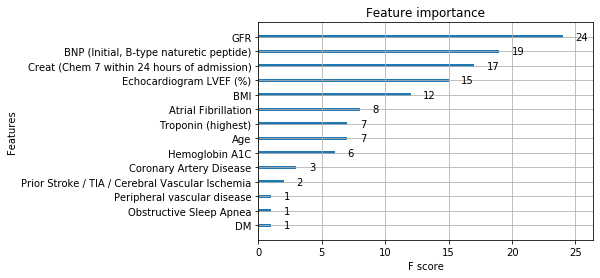

In [45]:
xgb.plot_importance(model)

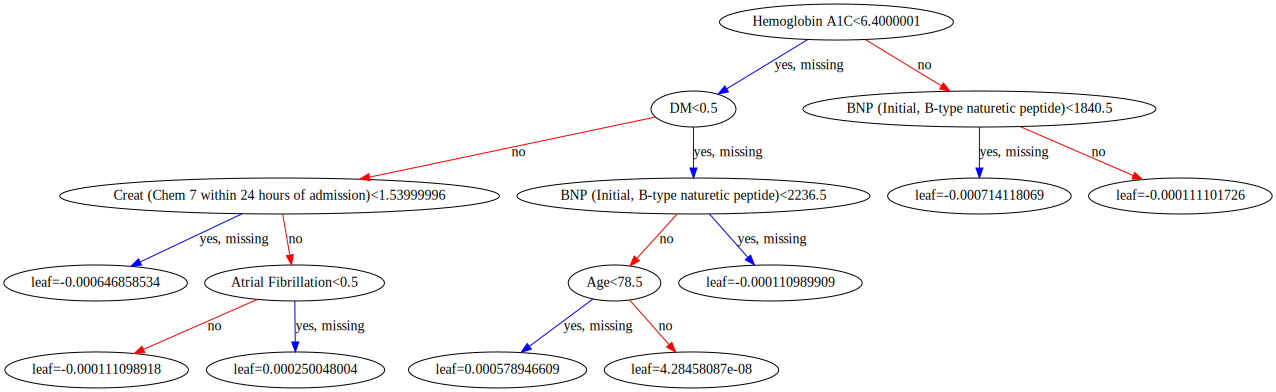

In [24]:
xgb.to_graphviz(model, num_trees=1)

In [25]:
model.save_model('5-13-20.model')

In [49]:
# Test a saved model

bst = xgb.Booster()  # init model
bst.load_model('5-13-20.model')  # load data

Y_xgb_predict_train = bst.predict(dtrain)
Y_xgb_predict = bst.predict(dtest)

from sklearn.metrics import accuracy_score, classification_report

print("Training Accuracy: " + str(accuracy_score(Y_xgb_train[:,0], Y_xgb_predict_train.round())))
print("Testing Accuracy: " + str(accuracy_score(Y_xgb_test[:,0], Y_xgb_predict.round())) + "\n")

print(classification_report(Y_xgb_test[:,0], Y_xgb_predict.round()))
# https://muthu.co/understanding-the-classification-report-in-sklearn/
# Precision = TP/(TP + FP)
# Recall = TP/(TP+FN)
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)

print("\nConfusion Matrix: ")
pd.crosstab(Y_xgb_test[:,0], Y_xgb_predict.round())
# row is label, column is prediction

Training Accuracy: 0.8555555555555555
Testing Accuracy: 0.6666666666666666

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78        22
         1.0       0.33      0.25      0.29         8

    accuracy                           0.67        30
   macro avg       0.54      0.53      0.53        30
weighted avg       0.64      0.67      0.65        30


Confusion Matrix: 


col_0,0.0,1.0
row_0,,
0.0,18,4
1.0,6,2


#### Testing out old model with new data

In [50]:
xgb_unsplit_data_new_slice = xgb_unsplit_data[103:]

print(xgb_unsplit_data_new_slice.shape)

labels = xgb_unsplit_data_new_slice[:,15:]
dat = xgb.DMatrix(xgb_unsplit_data_new_slice[:,:15])

bst = xgb.Booster()  # init model
bst.load_model('5-2-20.model')  # load data

labels_predict = bst.predict(dat)

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: " + str(accuracy_score(labels[:,0], labels_predict.round())))

print(classification_report(labels[:,0], labels_predict.round()))
# https://muthu.co/understanding-the-classification-report-in-sklearn/
# Precision = TP/(TP + FP)
# Recall = TP/(TP+FN)
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)

print("\nConfusion Matrix: ")
pd.crosstab(labels[:,0], labels_predict.round())
# row is label, column is prediction

(17, 17)
Accuracy: 0.7647058823529411
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        14
         1.0       0.33      0.33      0.33         3

    accuracy                           0.76        17
   macro avg       0.60      0.60      0.60        17
weighted avg       0.76      0.76      0.76        17


Confusion Matrix: 


col_0,0.0,1.0
row_0,,
0.0,12,2
1.0,2,1


In [51]:
# print the false negatives
print("False negatives: ")
false_neg = data.loc(0)[labels[(labels[:,0] == 1) & (labels_predict.round()==0)][:,1]]
false_neg[["30 day readmission", "60 day readmission", "30 day death", "60 day death", "90 day death"]]

False negatives: 


,30 day readmission,60 day readmission,30 day death,60 day death,90 day death
113.0,1,0.0,0.0,0.0,0.0
117.0,1,0.0,0.0,0.0,0.0


In [52]:
# print the false negatives
print("False positives: ")
false_neg = data.loc(0)[labels[(labels[:,0] == 0) & (labels_predict.round()==1)][:,1]]
false_neg[["30 day readmission", "60 day readmission", "30 day death", "60 day death", "90 day death"]]

False positives: 


,30 day readmission,60 day readmission,30 day death,60 day death,90 day death
112.0,0,0.0,0.0,1.0,1.0
116.0,0,1.0,0.0,0.0,0.0
